<a href="https://colab.research.google.com/github/jjbmsda/QML/blob/main/%08QML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pennylane torch numpy matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([4, 1])) that is different to the input size (torch.Size([4, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0: Loss = 0.4324
Epoch 10: Loss = 0.2196
Epoch 20: Loss = 0.1797
Epoch 30: Loss = 0.1756
Epoch 40: Loss = 0.1681
Epoch 50: Loss = 0.1647
Epoch 60: Loss = 0.1612
Epoch 70: Loss = 0.1565
Epoch 80: Loss = 0.1527
Epoch 90: Loss = 0.1516
Final Predictions: [[0.3724432  0.36251923]
 [0.57779396 0.60381573]
 [0.5926683  0.59288603]
 [0.3751223  0.36194602]]


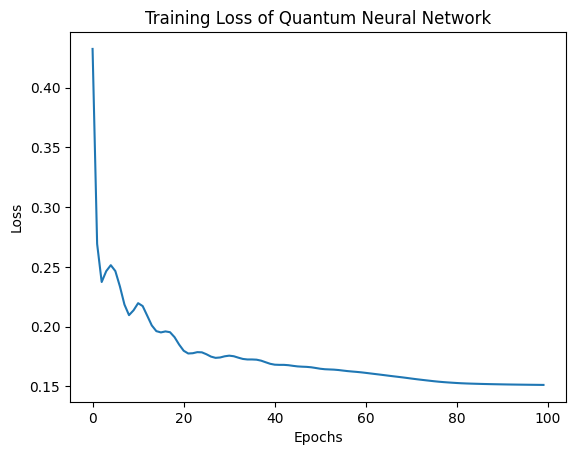

In [2]:
import pennylane as qml
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# 2개의 큐비트로 양자 회로 생성
n_qubits = 2
dev = qml.device("default.qubit", wires=n_qubits)

# 양자 회로 정의
@qml.qnode(dev, interface="torch")
def quantum_circuit(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits))  # 입력을 양자 상태로 변환
    qml.StronglyEntanglingLayers(weights, wires=range(n_qubits))  # 얽힘 적용
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]  # 측정 결과 반환

# 양자 뉴럴 네트워크 클래스
class QuantumNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        weight_shapes = {"weights": (3, n_qubits, 3)}  # 3개의 양자 게이트 레이어
        self.qlayer = qml.qnn.TorchLayer(quantum_circuit, weight_shapes)

    def forward(self, x):
        return self.qlayer(x)

# XOR 데이터 생성
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

# 모델 초기화
model = QuantumNeuralNetwork()
criterion = nn.MSELoss()  # 손실 함수 (Mean Squared Error)
optimizer = optim.Adam(model.parameters(), lr=0.1)  # 옵티마이저

# 학습
epochs = 100
losses = []
for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(X)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

# 최종 모델 평가
print("Final Predictions:", model(X).detach().numpy())

# 결과 시각화
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss of Quantum Neural Network")
plt.show()


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([4, 1])) that is different to the input size (torch.Size([4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0: Loss = 1.2832
Epoch 10: Loss = 1.0329
Epoch 20: Loss = 1.0039
Epoch 30: Loss = 1.0010
Epoch 40: Loss = 1.0008
Epoch 50: Loss = 1.0004
Epoch 60: Loss = 1.0001
Epoch 70: Loss = 1.0000
Epoch 80: Loss = 1.0000
Epoch 90: Loss = 1.0000
Final Predictions: [-0.00080833  0.00045533 -0.00012149  0.0019154 ]


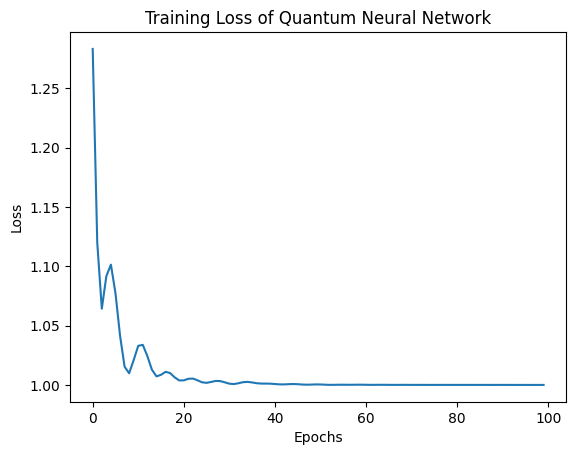

In [3]:
import pennylane as qml
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# 2개의 큐비트를 사용
n_qubits = 2
dev = qml.device("default.qubit", wires=n_qubits)

# 양자 회로 정의
@qml.qnode(dev, interface="torch")
def quantum_circuit(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits))  # 입력을 양자 상태로 변환
    qml.StronglyEntanglingLayers(weights, wires=range(n_qubits))  # 얽힘 적용
    return qml.expval(qml.PauliZ(0))  # 한 개의 값만 출력

# 양자 뉴럴 네트워크 클래스
class QuantumNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        weight_shapes = {"weights": (5, n_qubits, 3)}  # 레이어 수 증가
        self.qlayer = qml.qnn.TorchLayer(quantum_circuit, weight_shapes)

    def forward(self, x):
        return self.qlayer(x)

# XOR 데이터 (-1 ~ 1 범위로 조정)
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[-1], [1], [1], [-1]], dtype=torch.float32)

# 모델 초기화
model = QuantumNeuralNetwork()
criterion = nn.MSELoss()  # 손실 함수 (Mean Squared Error)
optimizer = optim.Adam(model.parameters(), lr=0.05)  # 학습률 조정

# 학습
epochs = 100
losses = []
for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(X)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

# 최종 모델 평가
print("Final Predictions:", model(X).detach().numpy())

# 결과 시각화
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss of Quantum Neural Network")
plt.show()


Epoch 0: Loss = 1.2041
Epoch 10: Loss = 0.3560
Epoch 20: Loss = 0.3543
Epoch 30: Loss = 0.3451
Epoch 40: Loss = 0.3416
Epoch 50: Loss = 0.3408
Epoch 60: Loss = 0.3401
Epoch 70: Loss = 0.3399
Epoch 80: Loss = 0.3399
Epoch 90: Loss = 0.3399
Final Predictions: [[0.23204431]
 [0.65914404]
 [0.6600324 ]
 [0.23143336]]


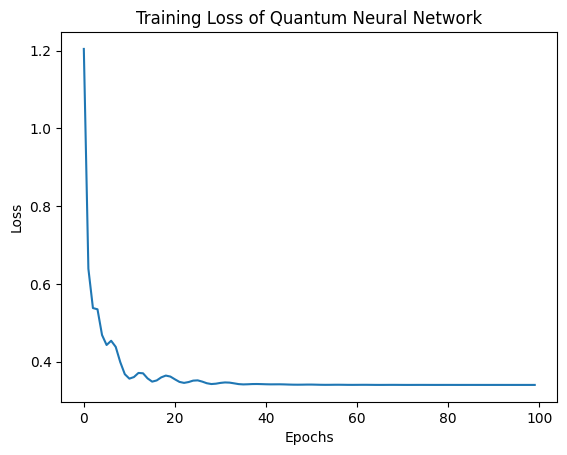

In [5]:
import pennylane as qml
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# 2개의 큐비트를 사용
n_qubits = 2
dev = qml.device("default.qubit", wires=n_qubits)

# 양자 회로 정의
@qml.qnode(dev, interface="torch")
def quantum_circuit(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits))  # 입력을 양자 상태로 변환
    qml.StronglyEntanglingLayers(weights, wires=range(n_qubits))  # 얽힘 적용
    return qml.expval(qml.PauliZ(0))  # 한 개의 값만 출력

# 양자 뉴럴 네트워크 클래스
class QuantumNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        weight_shapes = {"weights": (6, n_qubits, 3)}  # 레이어 수 증가
        self.qlayer = qml.qnn.TorchLayer(quantum_circuit, weight_shapes)

    def forward(self, x):
        return self.qlayer(x)

# XOR 데이터 (-1 ~ 1 범위로 조정)
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)  # 0~1 범위로 유지 (BCELoss 사용)

# 모델 초기화
model = QuantumNeuralNetwork()

# 가중치 랜덤 초기화 추가
for param in model.parameters():
    nn.init.uniform_(param, -0.1, 0.1)

# 손실 함수 변경 (MSE → BCE)
criterion = nn.BCELoss()

# 학습률 증가
optimizer = optim.Adam(model.parameters(), lr=0.1)

# 학습
epochs = 100
losses = []
for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(X).unsqueeze(1)  # 출력값을 2D 텐서로 변환
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

# 최종 모델 평가
final_output = model(X).unsqueeze(1).detach().numpy()  # 2D 변환
print("Final Predictions:", final_output)

# 결과 시각화
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss of Quantum Neural Network")
plt.show()


Epoch 0: Loss = 0.7652
Epoch 20: Loss = 0.5920
Epoch 40: Loss = 0.5861
Epoch 60: Loss = 0.5850
Epoch 80: Loss = 0.5848
Epoch 100: Loss = 0.5848
Epoch 120: Loss = 0.5848
Epoch 140: Loss = 0.5848
Epoch 160: Loss = 0.5848
Epoch 180: Loss = 0.5848
Epoch 200: Loss = 0.5848
Epoch 220: Loss = 0.5848
Epoch 240: Loss = 0.5848
Epoch 260: Loss = 0.5848
Epoch 280: Loss = 0.5848
Final Predictions: [[0.4427894 ]
 [0.55721056]
 [0.55721056]
 [0.4427894 ]]


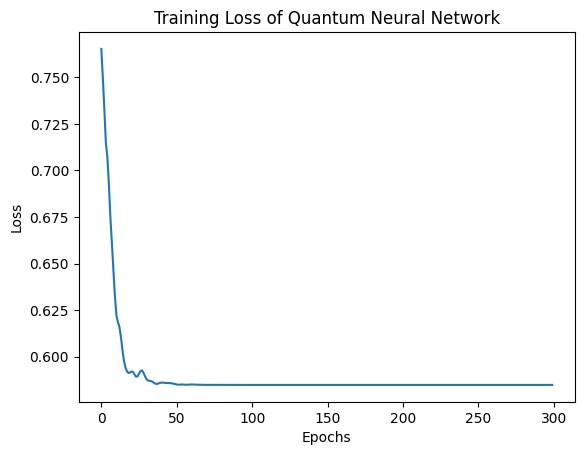

In [6]:
import pennylane as qml
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# 2개의 큐비트를 사용
n_qubits = 2
dev = qml.device("default.qubit", wires=n_qubits)

# 양자 회로 정의
@qml.qnode(dev, interface="torch")
def quantum_circuit(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits))  # 입력을 양자 상태로 변환
    qml.StronglyEntanglingLayers(weights, wires=range(n_qubits))  # 얽힘 적용
    return qml.expval(qml.PauliZ(0))  # 한 개의 값만 출력

# 양자 뉴럴 네트워크 클래스
class QuantumNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        weight_shapes = {"weights": (8, n_qubits, 3)}  # 레이어 수 증가 (8개)
        self.qlayer = qml.qnn.TorchLayer(quantum_circuit, weight_shapes)

    def forward(self, x):
        return self.qlayer(x)

# XOR 데이터 (-1 ~ 1 범위로 조정)
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)  # 0~1 범위로 유지 (BCELoss 사용)

# 모델 초기화
model = QuantumNeuralNetwork()

# 가중치 랜덤 초기화 추가
for param in model.parameters():
    nn.init.uniform_(param, -0.1, 0.1)

# 손실 함수 변경 (MSE → BCE)
criterion = nn.BCELoss()

# 학습률 감소 (안정성 개선)
optimizer = optim.Adam(model.parameters(), lr=0.05)

# 학습 횟수 증가 (더 정밀한 학습)
epochs = 300
losses = []
for epoch in range(epochs):
    optimizer.zero_grad()

    output = torch.sigmoid(model(X).unsqueeze(1))  # 시그모이드 활성화 적용
    loss = criterion(output, y)

    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if epoch % 20 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

# 최종 모델 평가
final_output = torch.sigmoid(model(X).unsqueeze(1)).detach().numpy()  # 시그모이드 적용
print("Final Predictions:", final_output)

# 결과 시각화
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss of Quantum Neural Network")
plt.show()
